# Corn Leaf Diseases Detection Through Deep Neural Network
Corn leaf has 3 kinds of diseases
<ul>
<li>Blight</li>
<li>Grey Leaf Spot</li>
<li>Common Rust</li>
<li>Healthy</li>
</ul>

### Prepare local Machine

```
pip install jupyter
pip install tensorflow
pip install numpy
pip install matplotlib
```


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


batch size 32 mean we process 32 image together in a single unit

In [3]:
Image_Size= (256,256)
Batch_Size = 32

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    # "E:/Desktop/Projects/corn_leaf/data/",
    "/content/drive/MyDrive/Academic/corn leaf/data/",
    image_size = Image_Size,
    batch_size = Batch_Size,
    shuffle = True
)

class_names = dataset.class_names
print(dataset.class_names)
print("\nTotal data chunk (*batch_size): ", len(dataset))


Found 4188 files belonging to 4 classes.
['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

Total data chunk (*batch_size):  131


### View our Data
Convert image to numpy array to display through matplotlib

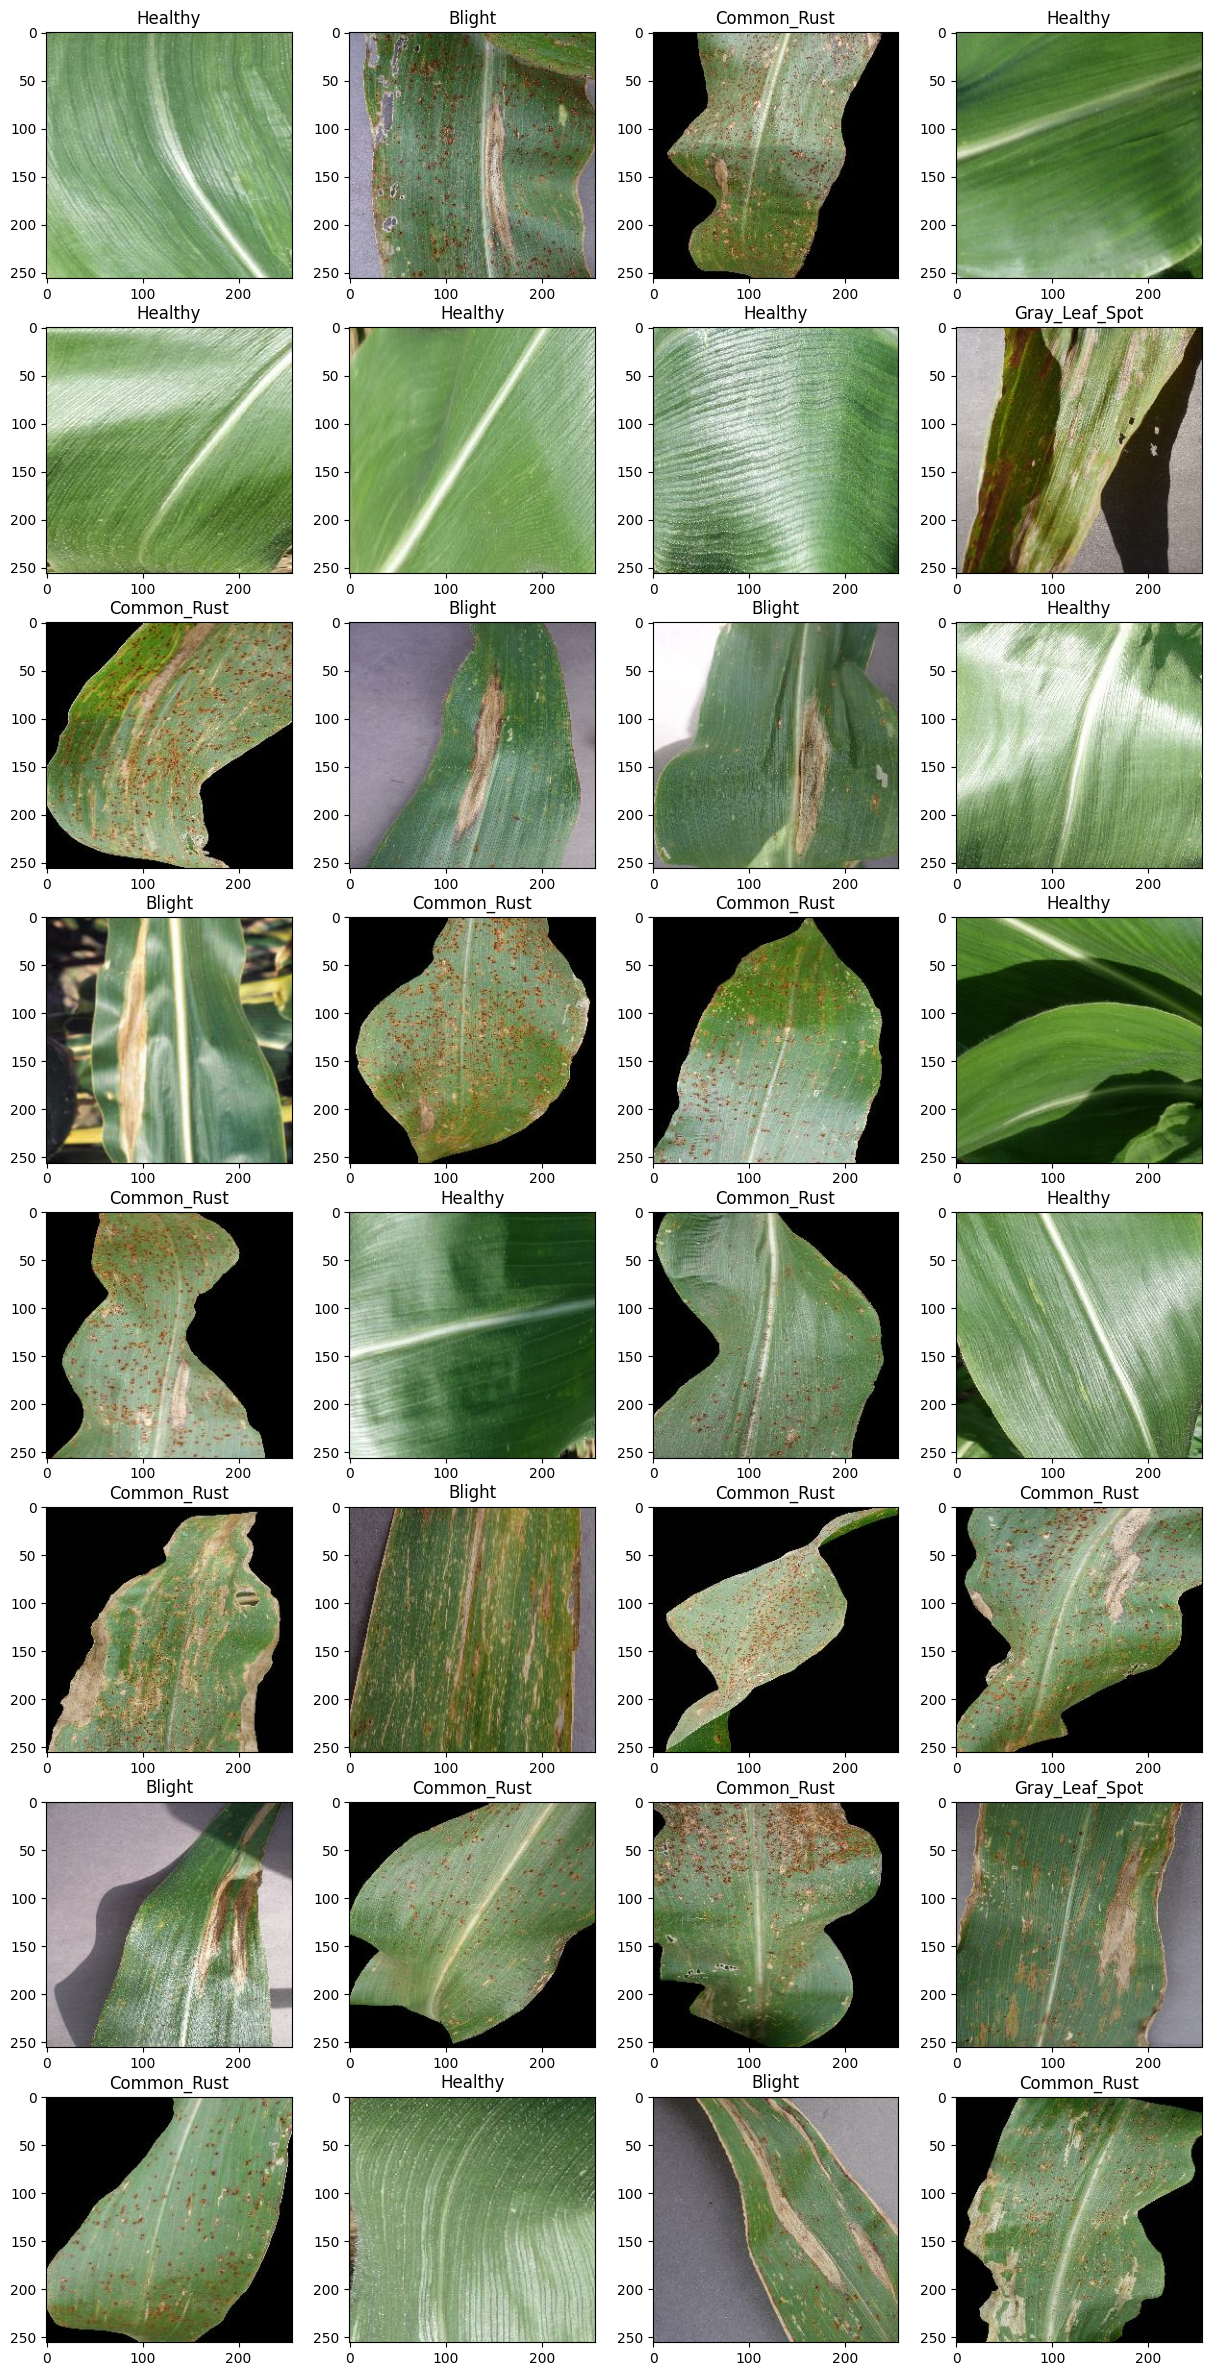

In [9]:
plt.figure(figsize=(15,30))
for per_img_batch, label_batch in dataset.take(1):
    for i in range(32):
        ax = plt.subplot(8,4, i+1)
        plt.imshow(per_img_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])


### Train test split

* Shuffle our dataset 1000 times
* Each train, test, validation dataset has 32 image as batch size

**Validation dataset** is like test dataset but used in model training to fine-tunning the model

In [5]:
dataset_size = len(dataset)
dataset = dataset.shuffle(1000)

train_size = int(0.8 * dataset_size)
validation_size = int(0.1 * dataset_size)

train_ds = dataset.take(train_size)
validation_ds = dataset.skip(train_size).take(validation_size)
test_ds = dataset.skip(train_size).skip(validation_size)

print("Train_size: *32(batch_size): ",len(train_ds))
print("Test_size:", len(test_ds))
print("Validation_size: ", len(validation_ds))

Train_size: *32(batch_size):  104
Test_size: 14
Validation_size:  13


### Shuffle and Store dataset in cache for faster loading

In [6]:
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Developping our model

In [7]:
preprocessing = tf.keras.models.Sequential([
    tf.keras.layers.Resizing(256,256),
    tf.keras.layers.Rescaling(1.0/255),
])


### Convolution multiple image pixels with specific matrix and generate new image
![image-2.png](attachment:image-2.png)


### Convolution
```
tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

Activation = "relu" means we remove negative pixels with 0
64 different filter used
each filter 3x3 size
```

### Maxxplooling take the biggest pixel also reduce the size of the image
![image.png](attachment:image.png)


In [8]:
input_shape = (Batch_Size,256, 256, 3)

model = tf.keras.Sequential([
    preprocessing,
    # tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),
    # next layers in the neural network with 64 unit
    tf.keras.layers.Dense(64, activation='relu'),
    # Final Layer with 4 class
    tf.keras.layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 891,854 (3.40 MB)

 Trainable params: 297,284 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 594,570 (2.27 MB)

In [9]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

### We need to put a callback so that training stop at a certain level of accuracy

In [10]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        '''
        Halts the training when accuracy over 90%
        '''
        if logs['accuracy'] >= 0.92:
            print("Accuracy over 92 parcent hence close training")
            self.model.stop_training = True


In [12]:
from re import VERBOSE
model.fit(train_ds,
          epochs = 10,
          batch_size = Batch_Size,
          validation_data = validation_ds,
          callbacks=[myCallback()],
          verbose = 1
          )

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 797s 350ms/step - accuracy: 0.5175 - loss: 1.0571 - val_accuracy: 0.8269 - val_loss: 0.4623
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.7877 - loss: 0.5536 - val_accuracy: 0.8389 - val_loss: 0.3778
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.8458 - loss: 0.3901 - val_accuracy: 0.8654 - val_loss: 0.3050
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8558 - loss: 0.3430 - val_accuracy: 0.8678 - val_loss: 0.2958
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.8827 - loss: 0.2896 - val_accuracy: 0.8750 - val_loss: 0.2826
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.8947 - loss: 0.2617 - val_accuracy: 0.8630 - val_loss: 0.2851
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.8834 - loss: 0.2832 - val_accuracy: 0.8798 - val_loss: 0.2532
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.9043 - loss: 0.2276 - val_

### Saving our model

In [17]:
model.save('/home/corn_model.h5')
model.save('/home/corn_model.keras')

In [ ]:
model = tf.keras.models.load_model('corn_model.keras')
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Test Result

In [15]:
result = model.evaluate(test_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.9378 - loss: 0.1484


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━

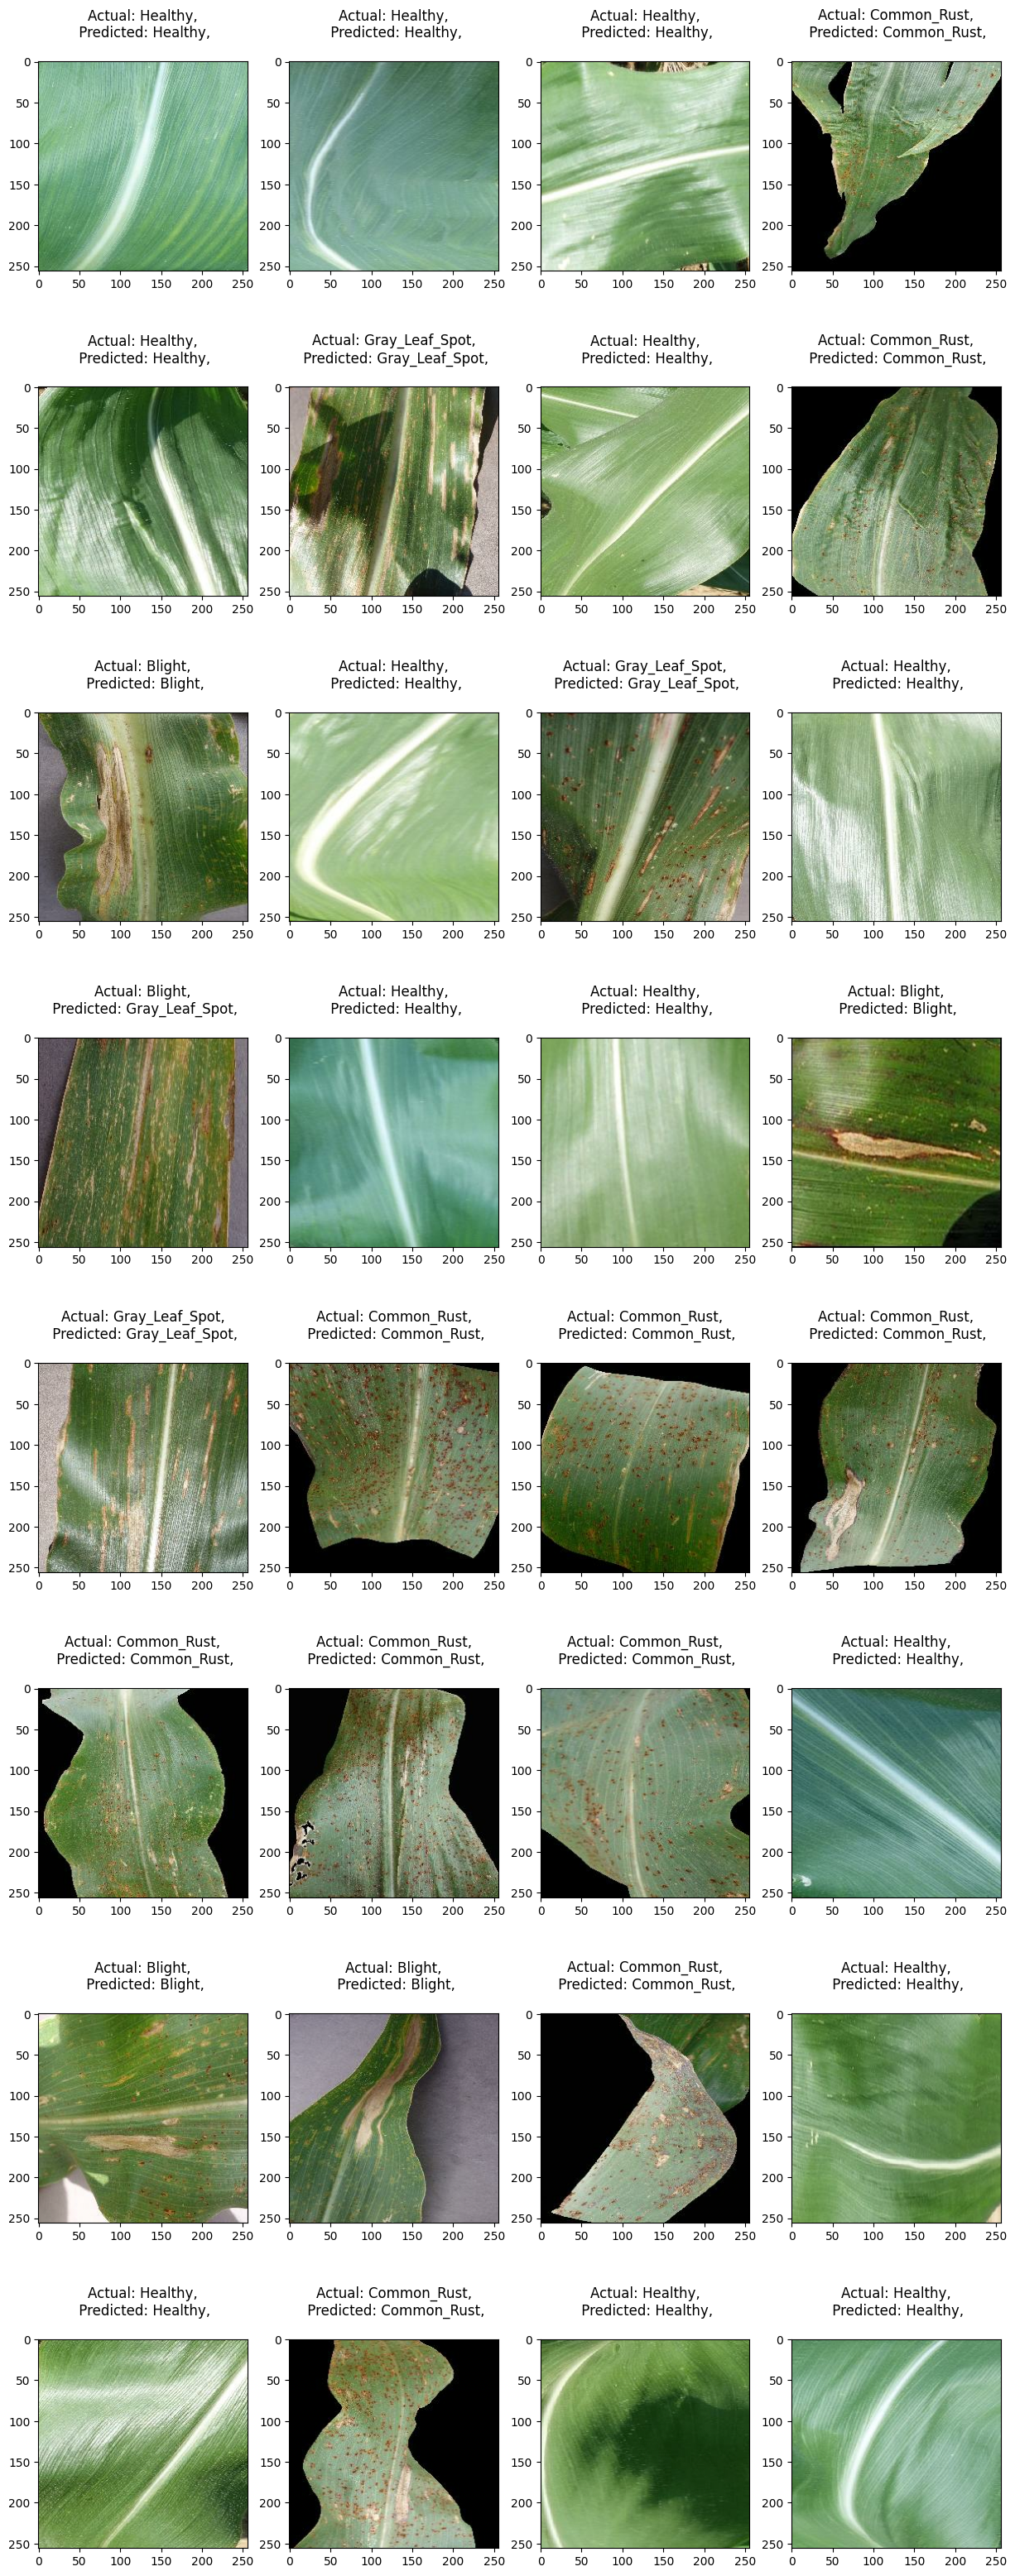

In [16]:
plt.figure(figsize=(15,40))
for images, labels in test_ds.take(1):
    for i in range(32):
        ax = plt.subplot(8,4, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
        img_array = tf.expand_dims(img_array, 0)

        predictions = model.predict(img_array)
        # print(predictions)
        predicted_class = class_names[np.argmax(predictions[0])]
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n")
